Yuan Maulvi Hafiizh / 2209106107

<h2> POSTTEST 5

# Import Library

- 'pandas' untuk manipulasi, membaca dataset karyawan, memeriksa missing values, mengelola duplikat data, dan melakukan analisis data lainnya sebelum diproses lebih lanjut dalam model deep learning

In [ ]:
import pandas as pd

# Membaca Dataset & Menampilkan DataFrame

- 'pd.read_csv()' digunakan untuk membaca file CSV dan mengubahnya menjadi DataFrame
- 'df' untuk menampilkan dataframe

In [ ]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# Pengecekan Missing Values
- 'isna()' digunakan untuk mendeteksi nilai yang hilang (missing values) atau NaN dalam DataFrame. Setiap kolom akan diperiksa apakah ada nilai yang hilang.
- 'sum()' akan menjumlahkan jumlah missing values di setiap kolom, sehingga kita dapat melihat berapa banyak data yang hilang untuk masing-masing fitur.

In [ ]:
df.isna().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


<h4>Hasil menunjukkan bahwa tidak ada missing values di semua kolom dataset.

# Pengecekan Data Duplikat

- 'duplicated()' digunakan untuk mengidentifikasi baris-baris duplikat dalam DataFrame. Baris yang duplikat adalah baris yang memiliki nilai yang sama di semua kolom dengan baris lain di DataFrame.
- 'sum()' digunakan untuk menghitung jumlah total baris yang terdeteksi sebagai duplikat.

In [ ]:
df.duplicated().sum()

1889

<h4> terdapat 1889 baris duplikat dalam dataset

# Menghapus Baris Duplikat

- 'drop_duplicates()' digunakan untuk menghapus semua baris yang terdeteksi sebagai duplikat di DataFrame.
- 'inplace=True' memastikan bahwa perubahan langsung diterapkan ke DataFrame asli tanpa perlu membuat salinan.

In [ ]:
df.drop_duplicates(inplace=True)

# Menampilkan Informasi DataFrame

- 'info()' memberikan detail penting tentang DataFrame, seperti jumlah total baris (entries), nama kolom, jumlah nilai non-null di setiap kolom, dan tipe data (dtype) masing-masing kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


- Setelah menghapus duplikat, jumlah baris dalam dataset berkurang dari 4653 menjadi 2764 baris.
- Dataset memiliki 9 kolom, dengan tipe data campuran antara object (untuk kolom kategorikal) dan int64 (untuk kolom numerik).

# LabelEncoder
<h4> LabelEncoder digunakan untuk mengubah nilai-nilai kategorikal menjadi nilai numerik

- encoder = LabelEncoder() membuat objek LabelEncoder.
- columns = ["Education", "City", "Gender", "EverBenched"] menentukan daftar kolom yang berisi data kategorikal yang akan dikonversi.
- Loop for cols in columns:: Pada setiap iterasi, LabelEncoder menerapkan konversi pada kolom yang tercantum dalam variabel columns.
- fit_transform(df[cols]) digunakan untuk melakukan pelatihan dan transformasi pada kolom yang diberikan, mengonversi nilai kategorikal ke bentuk numerik. Misalnya, "Male" akan menjadi 1 dan "Female" menjadi 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns = ["Education", "City", "Gender", "EverBenched"]
for cols in columns:
    df[cols] = encoder.fit_transform(df[cols])

<h4> Kolom-kolom "Education", "City", "Gender", dan "EverBenched" sekarang berisi nilai numerik

# Pemisahan Fitur dan Label

<h4>x = df.drop("LeaveOrNot", axis=1):

- Baris ini digunakan untuk membuat DataFrame baru x yang berisi semua kolom dari dataset kecuali kolom "LeaveOrNot".
- df.drop() menghapus kolom "LeaveOrNot" dari DataFrame. Argumen axis=1 menunjukkan akan menghapus kolom, bukan baris.
- Fitur (X) menjadi variabel independen yang digunakan oleh model untuk melakukan prediksi.

y = df["LeaveOrNot"]:
- Baris ini mengambil kolom "LeaveOrNot" dan menyimpannya dalam variabel y.
- y akan menjadi label atau variabel dependen yang akan diprediksi oleh model.
- Label ini menunjukkan apakah seorang karyawan meninggalkan perusahaan (1) atau tidak (0).

In [ ]:
x = df.drop("LeaveOrNot", axis=1)
y = df["LeaveOrNot"]

# Data Splitting

from sklearn.model_selection import train_test_split:
- digunakan untuk membagi dataset menjadi data latih dan data uji.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3):
- train_test_split() memisahkan data fitur (x) dan label (y) menjadi data latih dan data uji.
- Argumen test_size=0.3 menunjukkan bahwa 30% dari dataset akan digunakan sebagai data uji (test set), sedangkan 70% sisanya akan digunakan sebagai data latih (training set).
- x_train dan y_train adalah data latih yang akan digunakan untuk melatih model.
- x_test dan y_test adalah data uji yang akan digunakan untuk mengevaluasi performa model setelah pelatihan.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Normalisasi Data

from sklearn.preprocessing import StandardScaler:
- digunakan untuk melakukan scaling (normalisasi) data sehingga memiliki distribusi dengan mean = 0 dan standar deviasi = 1.

scaler = StandardScaler():
- Membuat objek scaler dari kelas StandardScaler. Objek ini akan digunakan untuk menghitung mean dan standar deviasi dari data latih

x_train = scaler.fit_transform(x_train):
- scaler menghitung mean dan standar deviasi dari data latih x_train dan kemudian mengaplikasikan transformasi untuk menormalisasi data.
-fit_transform() melakukan dua hal yaitu Menghitung mean dan standar deviasi dari data latih dan menerapkan transformasi normalisasi pada data latih berdasarkan nilai mean dan standar deviasi yang sudah dihitung.

x_test = scaler.transform(x_test):
-  menerapkan transformasi yang sama pada data uji x_test.
- transform() hanya menerapkan transformasi berdasarkan mean dan standar deviasi yang dihitung dari data latih (fit)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Membangun Model Deep Learning dengan Keras(sequential model)

from keras import Sequential:

- digunakan untuk membuat model berlapis yang ditambahkan secara sekuensial.

from keras.layers import Dense:

- digunakan untuk membuat fully connected layer (lapisan dengan semua neuron terhubung ke lapisan sebelumnya).

In [ ]:
from keras import Sequential
from keras.layers import Dense

model = Sequential():
- Membuat objek model Sequential, yang akan digunakan untuk menambahkan lapisan-lapisan berikutnya secara bertahap.

model.add(Dense(128, activation="relu", input_dim=8)):

- Menambahkan layer pertama dengan 128 neuron.
- activation="relu" menunjukkan bahwa setiap neuron dalam layer ini menggunakan fungsi aktivasi ReLU (Rectified Linear Unit), yang membantu mempercepat konvergensi dalam training.
- input_dim=8 menunjukkan bahwa layer ini menerima 8 fitur input, sesuai dengan jumlah fitur dalam dataset.

model.add(Dense(64, activation="relu")):

- Menambahkan layer kedua dengan 64 neuron, juga menggunakan fungsi aktivasi ReLU.

model.add(Dense(32, activation="relu")):

- Menambahkan layer ketiga dengan 32 neuron, juga menggunakan fungsi aktivasi ReLU.

model.add(Dense(1, activation="sigmoid")):

- Menambahkan output layer dengan 1 neuron. Karena ini adalah model untuk klasifikasi biner, kita menggunakan fungsi aktivasi sigmoid.
- Sigmoid menghasilkan output antara 0 dan 1, yang cocok untuk kasus klasifikasi biner seperti memprediksi apakah karyawan akan meninggalkan perusahaan (1) atau tidak (0).


In [ ]:
model = Sequential()

model.add(Dense(128, activation="relu", input_dim=8))

model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# EarlyStopping

from keras.callbacks import EarlyStopping:
- callback yang digunakan untuk memonitor performa model selama pelatihan dan menghentikan pelatihan jika tidak ada peningkatan kinerja model dalam beberapa epoch berturut-turut.

monitor_callback = EarlyStopping(monitor="val_accuracy", patience=10):

- monitor="val_accuracy": Fungsi ini memonitor akurasi validasi selama pelatihan. Jika akurasi validasi tidak membaik dalam beberapa epoch, pelatihan akan dihentikan.
- patience=10: Menentukan jumlah epoch sebelum pelatihan dihentikan jika tidak ada peningkatan akurasi. Dalam hal ini, model akan berhenti jika setelah 10 epoch berturut-turut tidak ada peningkatan pada akurasi validasi.

In [ ]:
from keras.callbacks import EarlyStopping
monitor_callback = EarlyStopping(monitor="val_accuracy", patience=10)

# Kompilasi Model

from keras.optimizers import Adam:

- Mengimpor optimizer Adam dari Keras. Adam adalah salah satu algoritma optimisasi yang populer karena kecepatan konvergensinya yang baik dalam training deep learning.

from keras.losses import binary_crossentropy:

- Mengimpor loss function binary_crossentropy dari Keras. Ini digunakan untuk tugas klasifikasi biner (dua kelas), seperti kasus memprediksi apakah karyawan akan meninggalkan perusahaan atau tidak.

In [ ]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"]):

- optimizer='Adam': untuk memperbarui bobot dalam jaringan saraf selama pelatihan. Optimizer ini menggabungkan keunggulan dari algoritma AdaGrad dan RMSProp, membuatnya efektif dalam berbagai kasus machine learning.

- loss='binary_crossentropy': Fungsi ini menghitung perbedaan antara label yang diprediksi (0 atau 1) dengan label sebenarnya selama proses training. Tujuannya adalah meminimalkan error yang dihasilkan oleh fungsi loss ini.

- metrics=["accuracy"]: Mengukur performa model menggunakan akurasi. Akurasi adalah proporsi prediksi yang benar dari keseluruhan prediksi yang dilakukan oleh model.

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

# Pelatihan Model

x_train dan y_train :
- Data fitur dan label untuk pelatihan.

validation_data=(x_test, y_test):
- Data validasi yang digunakan untuk mengevaluasi performa model pada data yang tidak dilihat selama pelatihan.

epochs=100:
- Model dilatih hingga maksimal 100 epoch, namun EarlyStopping akan menghentikan pelatihan lebih awal jika tidak ada peningkatan performa pada data validasi.

verbose=1:
- Menampilkan progres pelatihan per epoch, termasuk akurasi dan loss.

callbacks=[monitor_callback]:
- Menggunakan callback EarlyStopping yang telah didefinisikan sebelumnya untuk menghentikan pelatihan ketika akurasi validasi tidak meningkat selama 10 epoch berturut-turut.

In [ ]:
fit = model.fit(x = x_train, y = y_train,
                validation_data = (x_test,y_test),
                epochs=100, verbose=1,
                callbacks=[monitor_callback])

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6238 - loss: 0.6526 - val_accuracy: 0.6904 - val_loss: 0.5866
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.5722 - val_accuracy: 0.7229 - val_loss: 0.5402
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5337 - val_accuracy: 0.7566 - val_loss: 0.5138
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.4860 - val_accuracy: 0.7783 - val_loss: 0.4929
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7586 - loss: 0.4917 - val_accuracy: 0.7639 - val_loss: 0.4960
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.4698 - val_accuracy: 0.7976 - val_loss: 0.4691
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4515 - val_accuracy: 0.8036 - val_loss: 0.4610
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4292 - val_accuracy: 0.8000 - v

<h4> Model menunjukkan hasil yang baik dengan akurasi validasi yang stabil sekitar 79% setelah beberapa epoch.

# Evaluasi Model

- model.evaluate() digunakan untuk mengevaluasi model yang sudah dilatih pada data uji x_test dan y_test.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.4481 
Loss: 0.46671292185783386
Accuracy: 0.7759036421775818


- Loss: 0.4481, yang menunjukkan tingkat error dari prediksi model. Nilai ini cukup rendah, menandakan bahwa model bekerja dengan baik pada data uji.
- Accuracy: 0.7759 (atau sekitar 77.59%), menunjukkan bahwa model mampu memprediksi dengan benar sekitar 77.6% dari data uji.

# Visualisasi Akurasi dan Loss

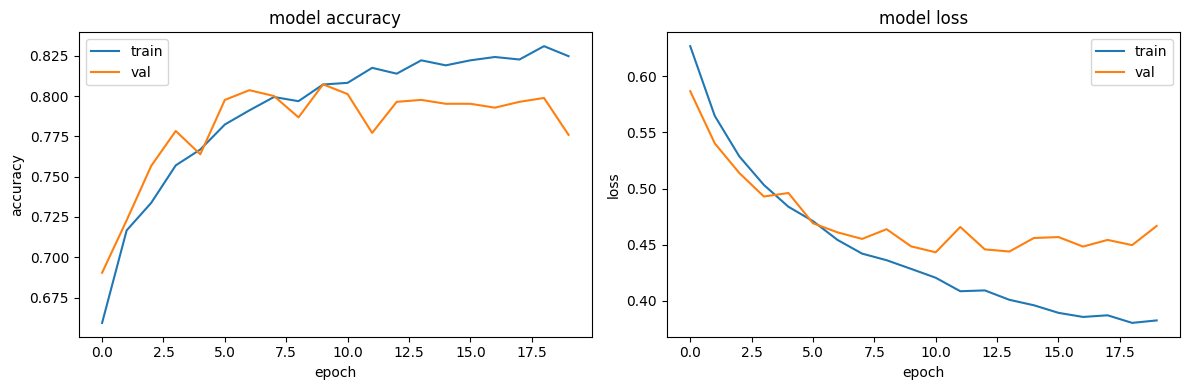

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'], label='train')
plt.plot(fit.history['val_accuracy'], label='val')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], label='val')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

Grafik Akurasi:

- Akurasi model pada data latih (biru) terus meningkat dan mencapai lebih dari 80% pada epoch terakhir.
- Akurasi validasi (oranye) juga meningkat, meskipun sedikit lebih rendah daripada data latih.
- Tidak ada tanda-tanda overfitting yang signifikan karena akurasi validasi tidak turun jauh di bawah akurasi pelatihan.

Grafik Loss:

- Loss pada data latih dan data validasi terus menurun selama pelatihan, menunjukkan bahwa model semakin baik dalam meminimalkan error.
- Pada akhir pelatihan, loss stabil di sekitar nilai yang rendah, menandakan bahwa model telah mencapai titik konvergensi.